In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Contents

* 차분
  * diff
* 차분으로 미분하기
  * diff_y / diff_x 
  * np.gradient
* 다항식 미분하기
  * poly1d
  * polyder  
* 수치미분(중앙차분)으로 미분 구하기
  * f'(x) = f(x+dx) - f(x-dx) / 2dx
  
* 적분
  * polyint, trapz, quad

## 차분

* diff

In [2]:
x = np.array([1,2,4,7,10])
x

array([ 1,  2,  4,  7, 10])

In [4]:
df1 = np.diff(x)  # 1차 차분 
df1

array([1, 2, 3, 3])

In [5]:
df2 = np.diff(df1) # 2차 차분
df2

array([1, 1, 0])

In [7]:
np.diff(x, 2)   #  한번에 n차 차분 가능 

array([1, 1, 0])

## 차분으로 미분하기

* diff_y / diff_x 
* np.gradient

In [29]:
x = np.array([1,2,3,4,5,6])
y = np.array([2,4,6,8,10,13])

In [30]:
dx = np.diff(x)
dy = np.diff(y)

In [31]:
dydx = np.zeros(y.shape, np.float)

dydx[:-1] = dy/dx   #  마지막 하나는 모자르다 
dydx[-1] = (y[-1] - y[-2]) / (x[-1] - x[-2]) # 마지막 것은 그 직전 것을 사용 
dydx

array([2., 2., 2., 2., 3., 3.])

In [32]:
np.gradient(y)     # 거의 비슷하다.

array([2. , 2. , 2. , 2. , 2.5, 3. ])

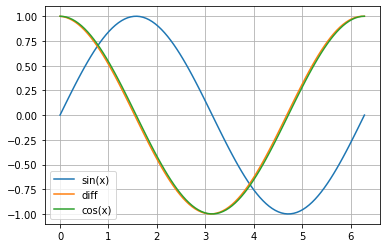

In [43]:
# 차분으로 sin함수 미분하기

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

# 차분으로 미분
dy = np.zeros(y.shape, np.float)
dy[:-1] = np.diff(y) / np.diff(x)
dy[-1] = (y[-1] - y[-2]) / (x[-1] - x[-2])

plt.plot(x,y, label='sin(x)')
plt.plot(x,dy, label='diff')
plt.plot(x,np.cos(x), label='cos(x)')   # 차분으로 구한 미분과 true값인 cos(x) 와 거의 같다.
plt.legend()
plt.grid()
plt.show()

## 다항식 미분하기

* poly1d
* polyder

In [45]:
# f(x) = x**2 - 2*x + 1
# f'(x) = 2*x -2

p = np.poly1d([1,-2,1])   
print(p)

   2
1 x - 2 x + 1


In [47]:
der = np.polyder(p)
print(der)

 
2 x - 2


## 수치미분(중앙차분)으로 미분 구하기

* f'(x) = f(x+dx) - f(x-dx)  / 2dx

In [49]:
def f(x):
    return x**2

In [53]:
def numerical_differentiation(f, x):  # 중앙 차분
    dx = 1e-7
    return (f(x+dx)-f(x-dx)) / (dx*2)

In [54]:
x = 10
numerical_differentiation(f, x)   # x^2 의 도함수는 2x 이고 10을 대입하면 20 

19.99999987845058

## 적분

* polyint, trapz, quad

In [3]:
p = np.poly1d([1,-2,1])
print(p)

   2
1 x - 2 x + 1


In [5]:
integral_p = np.polyint(p)    # polyint 로 적분된 다항식 표현
print(integral_p)

        3     2
0.3333 x - 1 x + 1 x


In [11]:
# trapz로 적분 계산

x = np.linspace(0,2,100)   # 0~2
y = x**3

np.trapz(y, x)

4.000408121620243

In [14]:
# quad 로 적분하기 

from scipy.integrate import quad

x = lambda x: x**3
quad(x, 0, 2)

(4.0, 4.440892098500626e-14)